In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import math

# Exercice 1 : RANDU

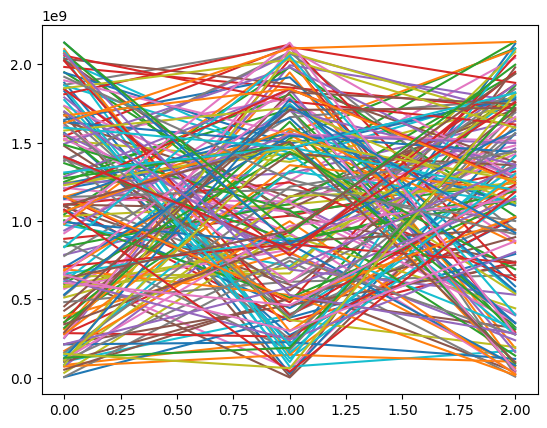

In [2]:
def generate_mod(x):
    return x * (2 ** 16 + 3) % 2 ** 31

def initialize():
    u0 = np.random.uniform(0, 2**31 - 1)
    while u0 % 2 == 0:
        u0 = np.random.uniform(0, 2**31 - 1)
    return u0


a = 2 ** 31 
u = [initialize()]
for _ in range(5 * 10 ** 2):
    u.append(generate_mod(u[-1]))

plt.figure()
for i in range(0, len(u) - 2, 3):
    subset = u[i:i+3]  
    plt.plot(subset, label=f'Suite {i//3}')  
#plt.legend()
plt.show()

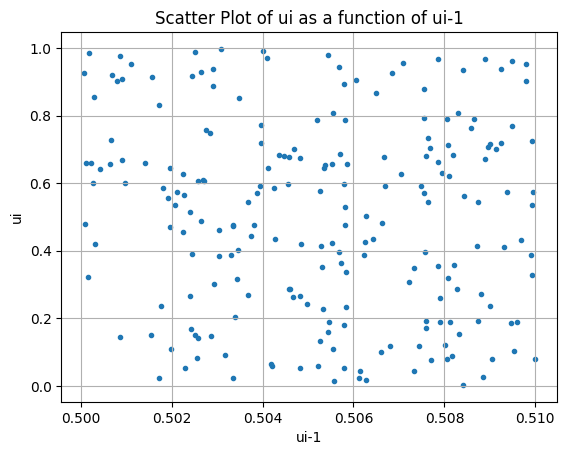

In [3]:
def randu(seed, n):
    result = []
    xn = seed
    for _ in range(n):
        xn = ((2 ** 16 + 3) * xn) % (2**31)
        result.append(xn / (2**31))
    return result

points = randu(1, 2 * 10**4)

filtered_points = [points[i] for i in range(1, len(points)) if 0.5 <= points[i-1] <= 0.51]
filtered_points_prev = [points[i-1] for i in range(1, len(points)) if 0.5 <= points[i-1] <= 0.51]

plt.scatter(filtered_points_prev, filtered_points, marker='.')
plt.xlabel('ui-1')
plt.ylabel('ui')
plt.title('Scatter Plot of ui as a function of ui-1')
plt.grid(True)
plt.show()


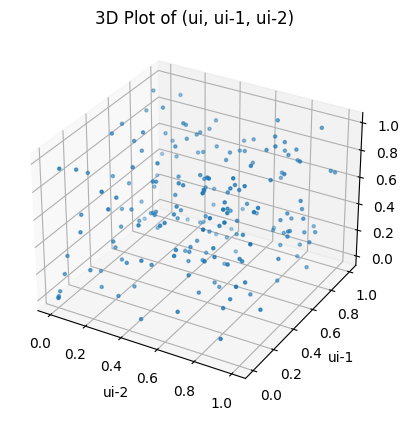

In [4]:
points = randu(1, 2 * 10**2)

# Generate triples (ui, ui-1, ui-2)
triples = [(points[i], points[i-1], points[i-2]) for i in range(2, len(points))]

# Unzip the triples
ui, ui_minus_1, ui_minus_2 = zip(*triples)

# Plot 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ui_minus_2, ui_minus_1, ui, marker='.')
ax.set_xlabel('ui-2')
ax.set_ylabel('ui-1')
ax.set_zlabel('ui')
ax.set_title('3D Plot of (ui, ui-1, ui-2)')

plt.show()

# Laplace and rejection

$ p(x) = \frac{1}{2} \exp (- |x|) $

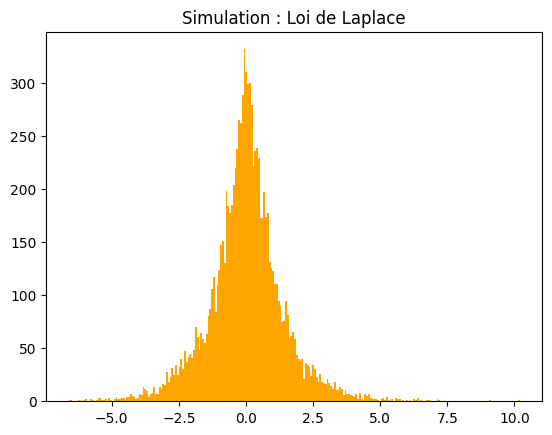

In [5]:
n = 10 ** 4

def simulation_laplace(size):
    u = np.random.uniform(size = size)
    simul = np.log(2 * u) * (u < 0.5) - np.log(2 * (1 - u)) * (u >= 0.5) 
    return simul

plt.figure()
plt.hist(simulation_laplace(size = n), bins = 250, color = 'orange')
plt.title('Simulation : Loi de Laplace')
plt.show()

On veut simuler la loi $ \mathcal{N} (0,1)$ à l'aide de la loi de laplace en utilisant la méthode de rejet. 

En notant $f $ la densité de probabilité d'une v.a suivant la loi $ \mathcal{N} (0,1)$ et $g$ la densité de probabilité d'une v.a suivant la loi de Laplace, on montre facilement que :  $ \frac{f(x)}{g(x)} \le \sqrt{ \frac{2}{ \pi} e} $ 

In [14]:
def simul_N_rejet(size):
    def rapport_densites(x):
        return np.exp(- (1/2) * ( np.abs(x) - 1)**2)
    Y = []
    for _ in range(size):
        X = simulation_laplace(1)
        U = np.random.uniform(1)
        while U > rapport_densites(X):
            X, U = simulation_laplace(1), np.random.uniform(1)
        Y.append(X)
    return Y 

plt.figure()
plt.hist(simul_N_rejet(10**3), bins = 'auto')
plt.show()

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

# Improved Box-Muller

$U, V \sim \mathcal{U} ([0,1])$, then $ X = \sqrt{- 2 \log(U) } \times \cos (2 \pi V) \text{  and  } Y = \sqrt{- 2 \log(U) } \times \sin (2 \pi V) \sim \mathcal{N} (0,1) $

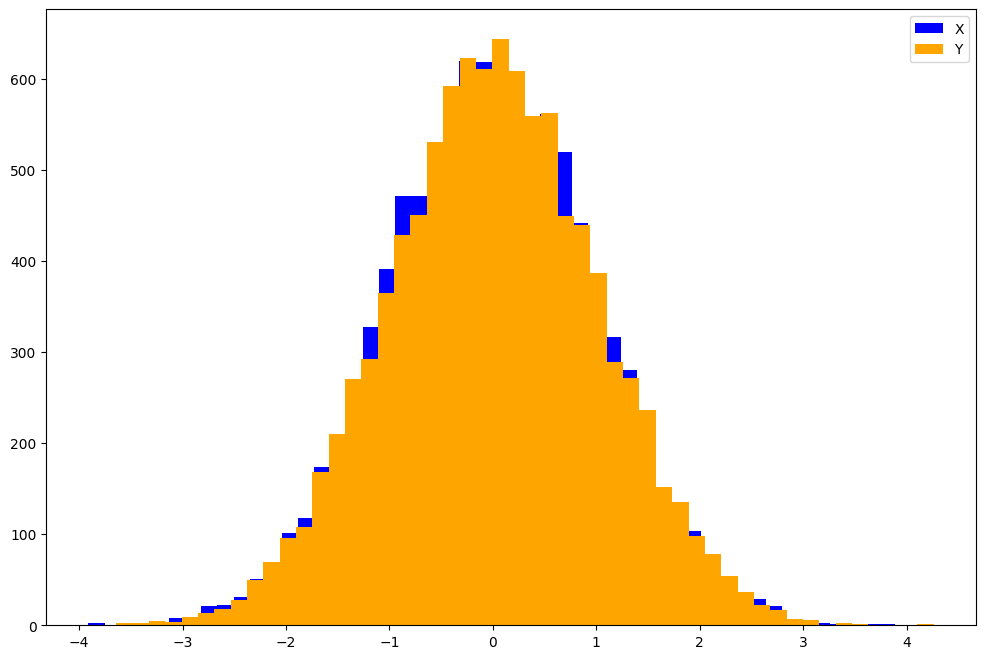

In [15]:
x = []
y = []

U = np.random.uniform(0,1,10000)
V = np.random.uniform(0,1,10000)
X = np.sqrt(-2 * np.log(U)) * np.cos(2 * math.pi * V)
Y = np.sqrt(-2 * np.log(U)) * np.sin(2 * math.pi * V)

plt.figure(figsize=(12,8))
plt.hist(X, bins = 50, color = 'blue', label = 'X')
plt.hist(Y, bins = 50, color = 'orange', label = 'Y')
plt.legend()
plt.show()

Modified Box-Muller 

$U, V \sim \mathcal{U} ([-1,1])$ 

Then if $ S := U^2 + V^2 \ne 1 $  do : 

- $ X = U \times \sqrt{- 2 \frac{ \log(S) }{S} } \sim \mathcal{N} (0,1) $ and $ Y = V \times \sqrt{- 2 \frac{ \log(S) }{S} }  \sim \mathcal{N} (0,1) $ 

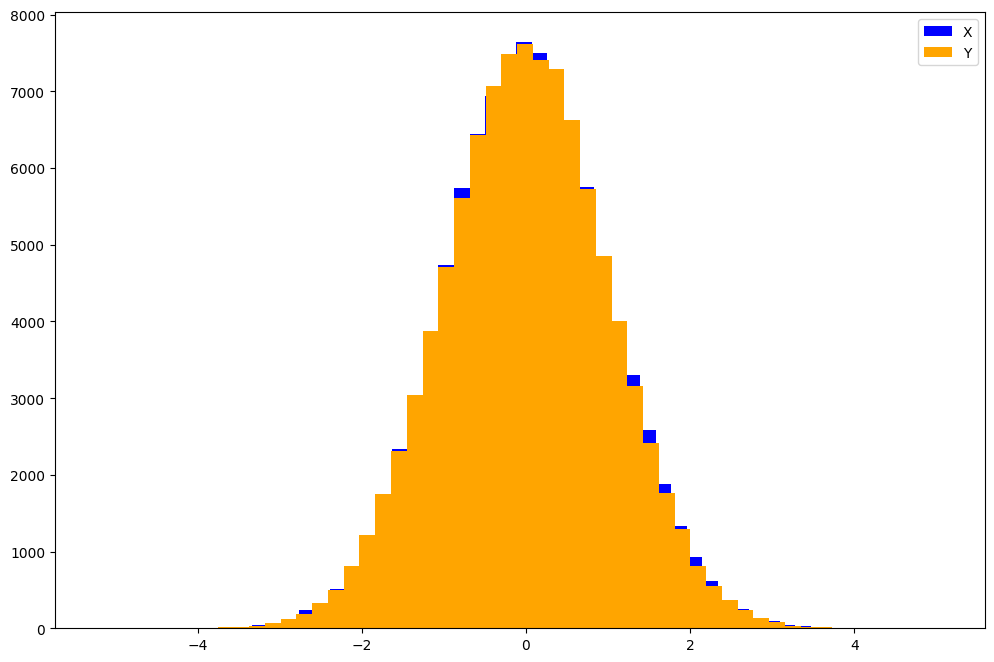

In [16]:
x = []
y = []

for _ in range(100000):
    U1 = np.random.uniform(-1,1)
    U2 = np.random.uniform(-1,1)
    while (U1 ** 2 + U2 ** 2) > 1:
        U1 = np.random.uniform(-1,1)
        U2 = np.random.uniform(-1,1)
    S = (U1 ** 2 + U2 ** 2)
    X = U1 * np.sqrt(-2 * np.log(S) / S)
    Y = U2 * np.sqrt(-2 * np.log(S) / S)
    x.append(X)
    y.append(Y)

plt.figure(figsize=(12,8))
plt.hist(x, bins = 50, color = 'blue', label = 'X')
plt.hist(y, bins = 50, color = 'orange', label = 'Y')
plt.legend()
plt.show()

# Geometric distribution

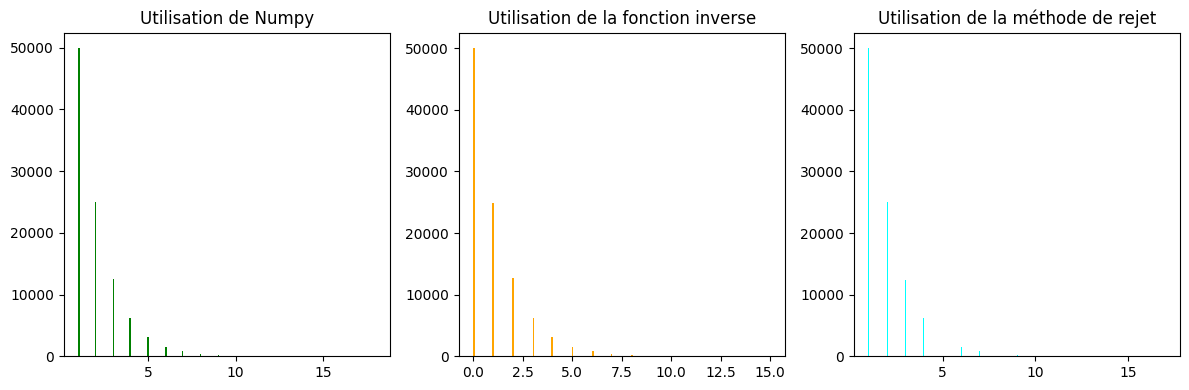

In [8]:
# Methode 1 : on utilise numpy 

m_1 = np.random.geometric(0.5, size = 10 ** 5)

# Méthode 2 : inverse
def geometric_inverse(p, size = 10 ** 5): 
    U = np.random.uniform(0,1, size)
    return (np.floor(np.log(U/p) / np.log(1-p)) + 1).astype(int)

m_2 = geometric_inverse(0.5)

# Méthode 3 : rejet 
def geometric_rejection(p, size = 10 ** 5):
    max_trials = 100
    samples = []
    for _ in range(size):
        k = 1
        while np.random.rand() >= p and k < max_trials:
            k += 1
        samples.append(k)
    return np.array(samples)

m_3 = geometric_rejection(0.5)


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(m_1, color = 'green', bins = 'auto')
plt.title('Utilisation de Numpy')

plt.subplot(1, 3, 2)
plt.hist(m_2, color = 'orange', bins = 'auto')
plt.title('Utilisation de la fonction inverse')

plt.subplot(1, 3, 3)
plt.hist(m_3, color = 'cyan', bins = 'auto')
plt.title('Utilisation de la méthode de rejet')

plt.tight_layout()  # Ajustement de l'espacement entre les graphiques

plt.show()

Remarque : 

$ \mathcal{G} (p) = \lfloor \mathcal{E}xp(p) \rfloor $  (égalité en loi).

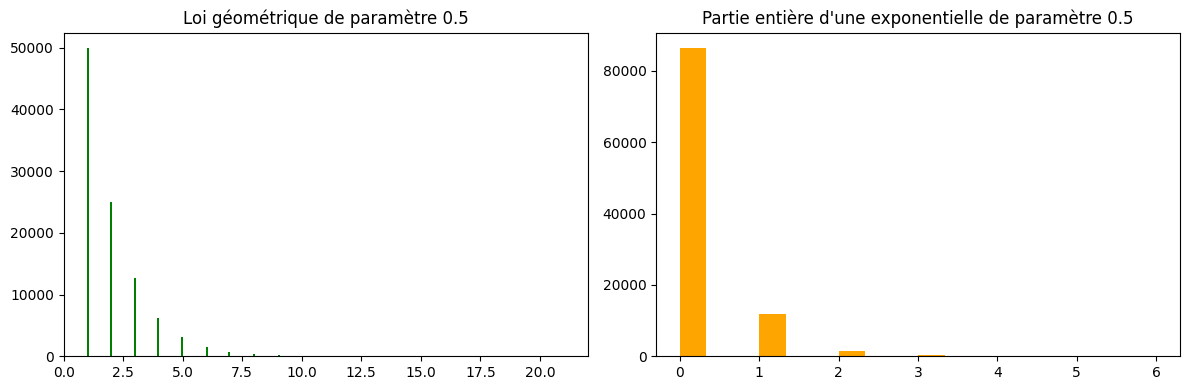

In [6]:
x = np.random.geometric(0.5, size = 100000)
y = np.floor(np.random.exponential(0.5, size = 100000))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(x, color = 'green', bins = 'auto')
plt.title('Loi géométrique de paramètre 0.5')

plt.subplot(1, 2, 2)
plt.hist(y, color = 'orange', bins = 'auto')
plt.title("Partie entière d'une exponentielle de paramètre 0.5")
plt.tight_layout() 
plt.show()

Moyennement convaincu.

# Control variates, variables antithétiques, QMC 


La technique des variables antithétiques est une méthode utilisée dans les simulations Monte Carlo pour réduire la variance de l'estimateur en introduisant des variables aléatoires corrélées négativement dans le processus de simulation. Cette technique est souvent appliquée lorsque l'on cherche à estimer une certaine quantité (par exemple, une espérance ou une intégrale) en utilisant des échantillons aléatoires.

Voici comment fonctionne la technique des variables antithétiques :

- Génération d'échantillons : Tout d'abord, des échantillons aléatoires sont générés selon la distribution de la variable d'intérêt. Ces échantillons sont généralement obtenus à partir de distributions uniformes ou normales.

- Création de variables antithétiques : Pour réduire la variance de l'estimateur, on génère une deuxième série d'échantillons aléatoires, appelés variables antithétiques. Ces variables sont construites de manière à être corrélées négativement avec les échantillons originaux. Par exemple, si les échantillons originaux sont tirés de la distribution uniforme sur $[0,1]$, les variables antithétiques seront obtenues en prenant 1 moins la valeur des échantillons originaux.

- Calcul de l'estimateur : L'estimateur de la quantité d'intérêt est alors calculé en prenant la moyenne des valeurs obtenues à partir des échantillons originaux et des variables antithétiques. Cette moyenne est souvent plus précise que celle obtenue à partir des échantillons originaux seuls, car les fluctuations aléatoires sont partiellement annulées par la corrélation négative entre les échantillons et leurs antithétiques.

Exemple : 

$ \hat{I} _{MC} = \frac{1}{N} \displaystyle _{i=1} ^N \phi(X_i) $ 

$ \hat{I} _{A} = \frac{1}{2N} \displaystyle _{i=1} ^N \phi(X_i) + \phi(-X_i) $ 

$ V(\hat{I} _{A}) \le V(\hat{I} _{MC}) $

La méthode des ** variables de contrôle ** est une technique utilisée dans les simulations Monte Carlo pour réduire la variance de l'estimateur en introduisant des variables supplémentaires (appelées variables de contrôle) dans le processus de simulation. Cette technique est particulièrement utile lorsque l'on cherche à estimer une certaine quantité (par exemple, une espérance ou une intégrale) en utilisant des échantillons aléatoires.

Voici comment fonctionne la méthode des variables de contrôle :

- Choix des variables de contrôle : Tout d'abord, vous identifiez des variables supplémentaires qui sont corrélées avec la variable d'intérêt que vous souhaitez estimer. Ces variables de contrôle doivent être facilement mesurables ou simulables et avoir une corrélation significative avec la variable d'intérêt.

- Simulation des variables de contrôle : Vous générez des échantillons aléatoires pour les variables de contrôle en utilisant des méthodes appropriées. Ces échantillons peuvent provenir de distributions uniformes, normales ou d'autres distributions selon le contexte.

- Estimation des coefficients de régression : Ensuite, vous estimez les coefficients de régression entre la variable d'intérêt et les variables de contrôle. Cela vous permet de modéliser la relation entre ces variables et d'utiliser cette relation pour ajuster l'estimateur de la variable d'intérêt.

- Ajustement de l'estimateur : Vous ajustez l'estimateur de la variable d'intérêt en utilisant les coefficients de régression estimés et les valeurs observées des variables de contrôle. Cela vous permet de réduire la variance de l'estimateur en prenant en compte les informations supplémentaires fournies par les variables de contrôle.

- Calcul de l'estimateur ajusté : Enfin, vous calculez l'estimateur ajusté de la variable d'intérêt en utilisant les valeurs observées des échantillons aléatoires et les coefficients de régression estimés. Cet estimateur ajusté devrait avoir une variance réduite par rapport à l'estimateur original grâce à l'utilisation des variables de contrôle.

Exemple : 

$ \hat{I} _{CV} = \frac{1}{N} \displaystyle _{i=1} ^N \phi(X_i) - \beta \phi(Z_i) $ avec $\beta $ à minimiser et $ \mathbb{E} (Z) =0$. 


Exercice : $ X \sim \mathcal{N} _d (0 , I_d) $ and we want to compute the probability that $ X \in A$ for a certain $A \subset \mathbb{R} ^2$.

In [28]:
# Estimateur naturel de Monte Carlo
def is_in_region_A(x, c):
    """ 
    x is a vector in R^d
    """
    x = np.array(x)
    if np.abs(np.prod(x)) <= c: return True
    else: return False

X = np.random.multivariate_normal([0,0],np.eye(2), size = 10**5)
for c in [0.5, 0.3, 0.2, 0.1, 0.01, 0.001]:
    compteur = 0 
    for i in range(10**5):
        Y = X[i]
        if is_in_region_A(Y, c):
            compteur +=1

    print("La probabilité vaut :", compteur / 10**5)


La probabilité vaut : 0.59291
La probabilité vaut : 0.44941
La probabilité vaut : 0.35039
La probabilité vaut : 0.21667
La probabilité vaut : 0.03718
La probabilité vaut : 0.00503


Réponse à la q1 : La probabilité que $X \in A$ diminue lorsque c diminue.

$ \hat{I} _{MC} = \frac{1}{N} \displaystyle \sum _{i=1} ^N 1 (X_i \in A)$

$ \displaystyle \sum _{i=1} ^N 1 (X_i \in A) \sim B(p, N) $ donc $ V(\hat{I} _{MC}) = \frac{p(1-p)}{N}$ avec $p = \mathbb{P} (X \in A)$. 

Enfaite, ce qui est mieux que la variance c'est l'écart-type et c'est ce à quoi on va s'intéresser. 

Une variance de 0.01 est très petite, mais si la quantité à estimer est 10**(-4) et bien c'est une variance impt ... 

On regarde donc l'écart type normalisé : $\frac{ \sqrt{ V( \hat{I} _{MC} })}{\mathbb{E} (\hat{I} _{MC})} = \frac{ \sqrt{1-p}}{ \sqrt{pN}} \to + \infty  \text{  when  } p \to + \infty$. 

q2 : On souhaite utiliser des variables de contrôle. 

C'est pas dutout trivial de trouver le bon Z. Dans le cours on utlise les moindres carrés ordinaires car dans des situations abstraites c'est galère. 

pb : quand c devient petit, l'écart-type relatif diverge. On veut résoudre le problème quand c devient petit. Donc la variable de contrôle va dépendre de A. 

On choisit : $ Z_i = \displaystyle \prod _{j=1} ^d |X_i ^j|$ 

In [ ]:
# utilisation de variables de contrôle



# Importance Sampling 

We consider again a standard multivariate Gaussian distribution. We want to approximate this time expectations with respect to the distribution of $X$
conditional on $X \in A$, where $A$ is some measurable subset of $ \mathbb{R} ^2 $.

>Explain why this conditional distribution has probability density:

Rappels sur l'importance sampling : 

On souhaite "overweight" la région $A$ en introduisant une nouvelle densité avec des poids de normalisation. Pour cela on introduit une densité g qui va nous permettre de plus tomber dans la région $A$. 

$ f(x) = \displaystyle \frac{ (2 \pi) ^{- \frac{d}{2}}}{ \mathbb{P} (X \in A)} \displaystyle e^{- \frac{1}{2} \sum _{i=1} ^d x_i ^2} $

Il manque $ \mathbb{1} (x \in A)$, afin que la fonction soit bien une densité de probabilité !

Correction de l'ennoncé :

$ f(x) = \displaystyle \frac{ (2 \pi) ^{- \frac{d}{2}}}{ \mathbb{P} (X \in A)} \displaystyle e^{- \frac{1}{2} \sum _{i=1} ^d x_i ^2}  \mathbb{1} (x \in A) $

A friend of yours proposes the following method: 

- (a) sample Xi from the base distribution (standard Gaussian of dimension d); 

- (b) compute the empirical mean and covariance matrix of the simulated points that fell in A; 

- (c) implement importance sampling based on a Gaussian proposal with mean and variance equal to the moments computed in (b). 

Is this a good idea? Discuss and/or implement this approach.

Principe de l'autonormalisation : 

Départ : On ne sait évaluer une fonction qu'à une constante de normalisation près. 

Solution : 

$ f_2 = cf $ et $ g_2 = dg $ et $ w = \frac{f}{g} $ 

$ \frac{1}{N} \displaystyle \sum \frac{\phi (Y_i) w_2 (Y_i)}{ \sum w_2 (Y_i)} = \frac{1}{N} \displaystyle \sum \frac{\phi (Y_i) w (Y_i)}{ \sum w (Y_i)}$

/Users/augustincablant/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/augustincablant/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2591: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spe

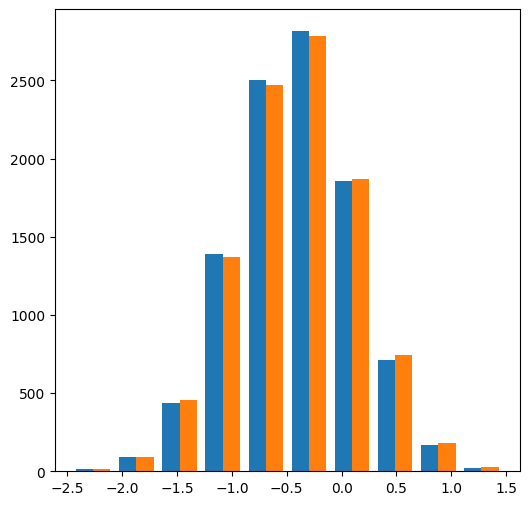

In [32]:
n = 10**4
X = np.random.multivariate_normal(np.zeros(2), np.eye((2)), size = n)
c = 0.5

def is_in_region_A(x, c):
    x = np.array(x)
    if np.abs(np.prod(x)) <= c: return x
    else: return -1

in_A = [is_in_region_A(x,c) for x in X]
in_A_filtered = [element for element in in_A if type(element) != int]

mean = np.mean(in_A)
mean = np.array([[mean[0]], [mean[1]]])
weights = np.ones_like(in_A) 
cov = np.cov(in_A, rowvar=False, fweights=weights)
cov = cov.item()
cov = np.array([[cov[0]], [cov[1]]])
cov2 = np.dot(cov, cov.T)

Y = np.random.multivariate_normal(mean.flatten(), cov2, size = n)
plt.figure(figsize=(6,6))
plt.hist(Y)
plt.show()